# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import pandas as pd
import numpy as np
meta_data = pd.read_csv('data3/mini.csv')

In [2]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [5]:
meta_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [6]:
meta_data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [21]:
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib

In [48]:
pay_pat_bar = meta_data.groupby('payment_pattern')['user_id'].count()
pay_pat_bar.sort_values

<bound method Series.sort_values of payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: user_id, dtype: int64>

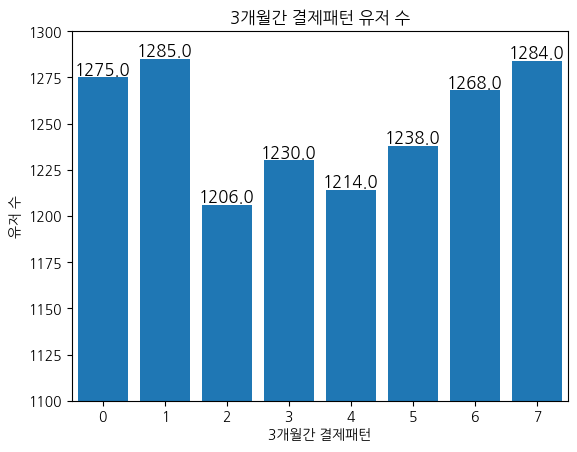

In [44]:
pay_pat_bar.plot.bar(rot=0)
plt.title("3개월간 결제패턴 유저 수")
plt.xlabel("3개월간 결제패턴")
plt.ylabel("유저 수")
plt.ylim(1100, 1300)

bar = plt.bar(pay_pat_bar.index,pay_pat_bar)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()

# 가설 1
첫 2개월은 결제했으나, 마지막달에 결제하지 않은 사용자]는 2개월간 사용 후 불만족한 부분이 생겨 구독을 취소했을 것이다.

불만족한 부분에 대해 고객 문의 이력이 많을 것이다.

In [51]:
meta_data.isnull().sum()
#결측치 없음

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

In [79]:
pay_inq_bar = meta_data.groupby('payment_pattern')['customer_inquiry_history'].mean()
pay_inq_bar

payment_pattern
0    1.995294
1    2.049805
2    2.002488
3    2.005691
4    2.046129
5    1.915186
6    2.015773
7    2.051402
Name: customer_inquiry_history, dtype: float64

In [70]:
pay_inq_pivot_table = pd.pivot_table(meta_data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['payment_pattern'], #index : 행에 들어가는 부분
                       columns=['customer_inquiry_history'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
pay_inq_pivot_table

customer_inquiry_history,0,1,2,3,4,5,6,7,8,10
payment_pattern,,,,,,,,,,
0,178.0,336.0,344.0,234.0,121.0,42.0,16.0,4.0,NaN,NaN
1,165.0,346.0,341.0,236.0,116.0,57.0,19.0,5.0,NaN,NaN
2,164.0,334.0,300.0,238.0,108.0,43.0,14.0,4.0,1.0,NaN
3,168.0,312.0,351.0,220.0,127.0,32.0,16.0,3.0,1.0,NaN
4,160.0,321.0,316.0,234.0,114.0,52.0,9.0,5.0,3.0,NaN
5,203.0,333.0,320.0,209.0,116.0,42.0,12.0,1.0,1.0,1.0
6,163.0,354.0,328.0,244.0,104.0,56.0,16.0,2.0,1.0,NaN
7,175.0,332.0,345.0,236.0,111.0,61.0,15.0,7.0,2.0,NaN


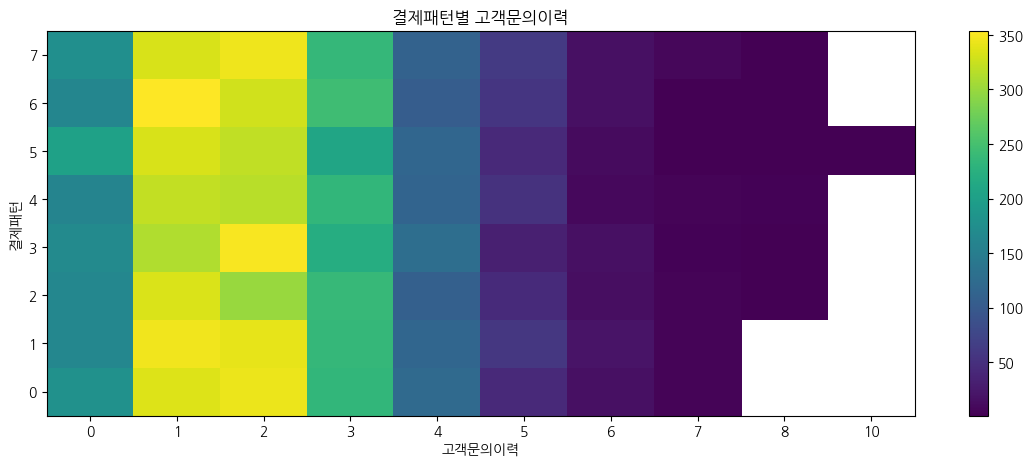

In [59]:
# 히트맵으로 나타내기
#그래프 사이즈 변경
plt.figure(figsize=(14,5))

#pcolor를 이용하여 heatmap 그리기
plt.pcolor(pay_inq_pivot_table)

#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(pay_inq_pivot_table.columns), 1), pay_inq_pivot_table.columns)

#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(pay_inq_pivot_table.index), 1), pay_inq_pivot_table.index)

#그래프 명
plt.title('결제패턴별 고객문의이력')

#그래프 x축 레이블
plt.xlabel('고객문의이력')

#그래프 y축 레이블
plt.ylabel('결제패턴')

#plt.colorbar() 명령어를 추가하면 그래프 옆에 숫자별 색상값을 나타내는 컬러바를 보여 줍니다
plt.colorbar()
plt.show()

<BarContainer object of 10000 artists>

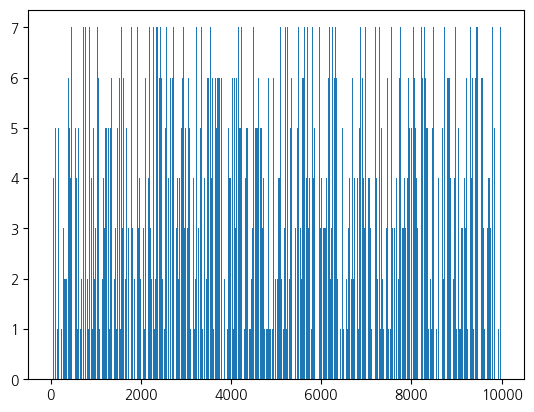

In [61]:
plt.bar(meta_data['customer_inquiry_history'].index, meta_data['payment_pattern'].values)

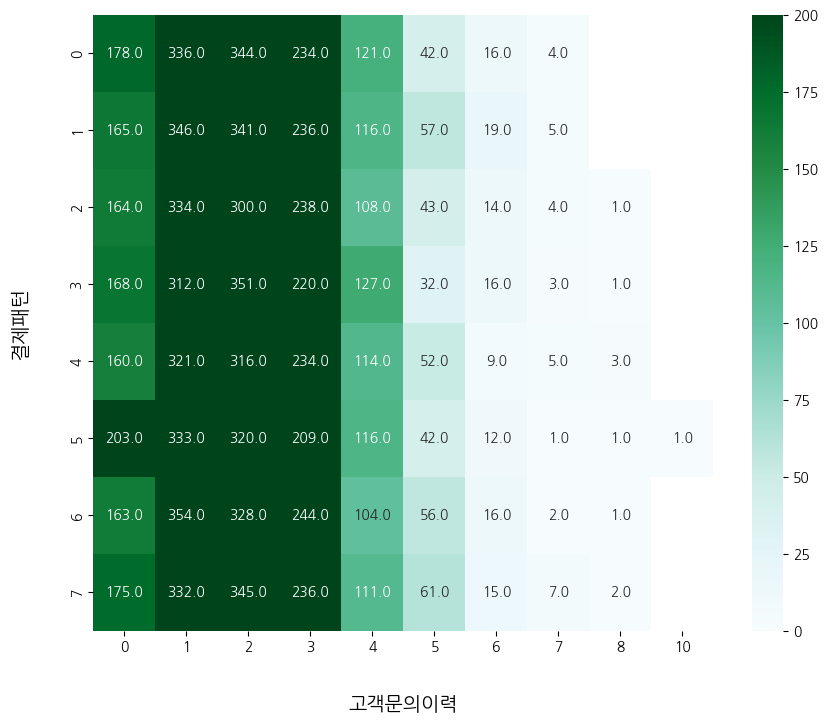

In [75]:
plt.figure(figsize=(10,8))

sns.heatmap(data= pay_inq_pivot_table,
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           fmt='.1f', #values(데이터의 값) 값의 소수점 표기
           vmin=0,# 색범위 최소값 설정
           vmax=200,# 색범위 최댓값 설정
           cmap="BuGn") #히트맵의 색을 설정합니다


plt.xlabel('고객문의이력', fontsize=14,labelpad=30)

plt.ylabel('결제패턴', fontsize=14,labelpad=30)
plt.yticks()

plt.show()

5건 이상 문의이력을 남긴 사용자 중 가장 높은 결제패턴은?

In [101]:
customer_inquiry_5 = meta_data[(meta_data['customer_inquiry_history']>=5)]
customer_inquiry_5_up = pd.DataFrame(customer_inquiry_5['customer_inquiry_history'])
customer_inquiry_5_up

,customer_inquiry_history
5,5
35,5
41,5
45,5
49,8
...,...
9884,5
9899,5
9903,6
9916,5


In [102]:
customer_inquiry_5_up2 = customer_inquiry_5_up.reset_index()
customer_inquiry_5_up2

,index,customer_inquiry_history
0,5,5
1,35,5
2,41,5
3,45,5
4,49,8
...,...,...
538,9884,5
539,9899,5
540,9903,6
541,9916,5


In [112]:
customer_inquiry_5_up3 = customer_inquiry_5_up2.set_index('customer_inquiry_history')
customer_inquiry_5_up3

,index
customer_inquiry_history,
5,5
5,35
5,41
5,45
8,49
...,...
5,9884
5,9899
6,9903


In [114]:
customer_inquiry_5_up3['customer_inquiry_history'].count()

KeyError: 'customer_inquiry_history'

In [107]:
pay_inq_pivot_table = pd.pivot_table(meta_data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['customer_inquiry_5_up3'], #index : 행에 들어가는 부분
                       columns=['payment_pattern'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
pay_inq_pivot_table

KeyError: 'customer_inquiry_5_up3'

In [145]:
pay_inq_pivot_table2 = pd.pivot_table(meta_data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['payment_pattern'], #index : 행에 들어가는 부분
                       columns=['customer_inquiry_history'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
pay_inq_pivot_table3 = pay_inq_pivot_table2.loc[:,'5':]
pay_inq_pivot_table3

customer_inquiry_history,5,6,7,8,10
payment_pattern,,,,,
0,42.0,16.0,4.0,NaN,NaN
1,57.0,19.0,5.0,NaN,NaN
2,43.0,14.0,4.0,1.0,NaN
3,32.0,16.0,3.0,1.0,NaN
4,52.0,9.0,5.0,3.0,NaN
5,42.0,12.0,1.0,1.0,1.0
6,56.0,16.0,2.0,1.0,NaN
7,61.0,15.0,7.0,2.0,NaN


<Axes: xlabel='payment_pattern'>

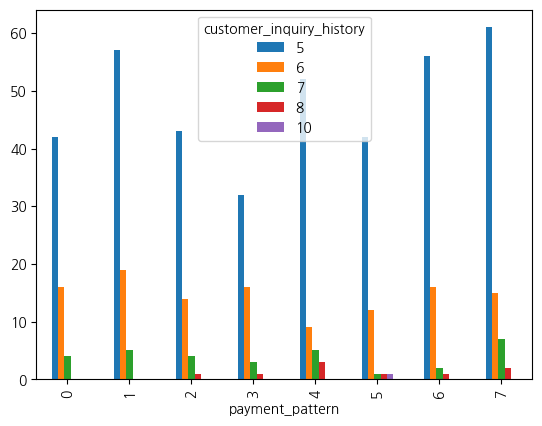

In [124]:
pay_inq_pivot_table3.plot.bar()

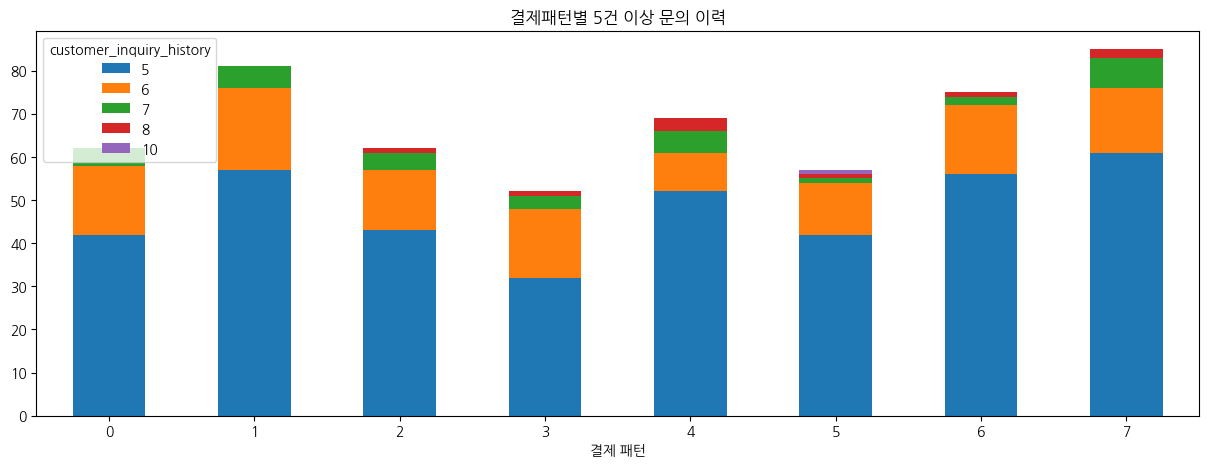

In [167]:
pay_inq_pivot_table3.plot.bar(rot=0, figsize=(15,5), stacked=True)
plt.title("결제패턴별 5건 이상 문의 이력")
plt.xlabel("결제 패턴")

plt.show()

In [134]:
pay_inq_pivot_table3.sum()

customer_inquiry_history
5     385.0
6     117.0
7      31.0
8       9.0
10      1.0
dtype: float64

In [140]:
pay_inq_pivot_table3['sum'] = pay_inq_pivot_table2.loc[:,'7':].sum(axis=1)
pay_inq_pivot_table3.loc[:,'7':]

C:\Users\nb772\AppData\Local\Temp\ipykernel_2412\3632167431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pay_inq_pivot_table3['sum'] = pay_inq_pivot_table2.loc[:,'7':].sum(axis=1)


KeyError: '7'

In [168]:
pay_inq_pivot_table2

customer_inquiry_history,0,1,2,3,4,5,6,7,8,10
payment_pattern,,,,,,,,,,
0,178.0,336.0,344.0,234.0,121.0,42.0,16.0,4.0,NaN,NaN
1,165.0,346.0,341.0,236.0,116.0,57.0,19.0,5.0,NaN,NaN
2,164.0,334.0,300.0,238.0,108.0,43.0,14.0,4.0,1.0,NaN
3,168.0,312.0,351.0,220.0,127.0,32.0,16.0,3.0,1.0,NaN
4,160.0,321.0,316.0,234.0,114.0,52.0,9.0,5.0,3.0,NaN
5,203.0,333.0,320.0,209.0,116.0,42.0,12.0,1.0,1.0,1.0
6,163.0,354.0,328.0,244.0,104.0,56.0,16.0,2.0,1.0,NaN
7,175.0,332.0,345.0,236.0,111.0,61.0,15.0,7.0,2.0,NaN


In [191]:
target1 = meta_data.groupby(['target','payment_pattern'])['user_id'].count()
target2 = pd.DataFrame(target1)
target2

user_id
target payment_pattern         
0      0                    468
       1                    502
       2                    459
       3                    467
       4                    461
       5                    488
       6                    467
       7                    489
1      0                    807
       1                    783
       2                    747
       3                    763
       4                    753
       5                    750
       6                    801
       7                    795

In [194]:
target2.loc[('target','1'),:]

KeyError: ('target', '1')

<Axes: xlabel='target,payment_pattern'>

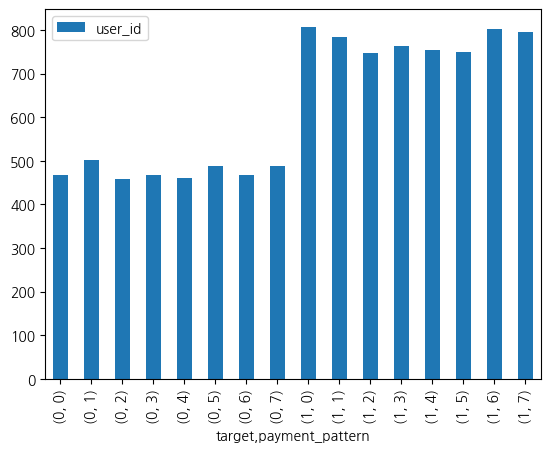

In [196]:
target2.plot.bar()

In [197]:
target_pivot_table = pd.pivot_table(meta_data, values='user_id',   #values : 열에 들어 가는 부분
                       index=['payment_pattern'], #index : 행에 들어가는 부분
                       columns=['target'],  
                       aggfunc="count")  #aggfunc : 데이터 축약시 사용할 함수
target_pivot_table

target,0,1
payment_pattern,,
0,468,807
1,502,783
2,459,747
3,467,763
4,461,753
5,488,750
6,467,801
7,489,795


(400.0, 900.0)

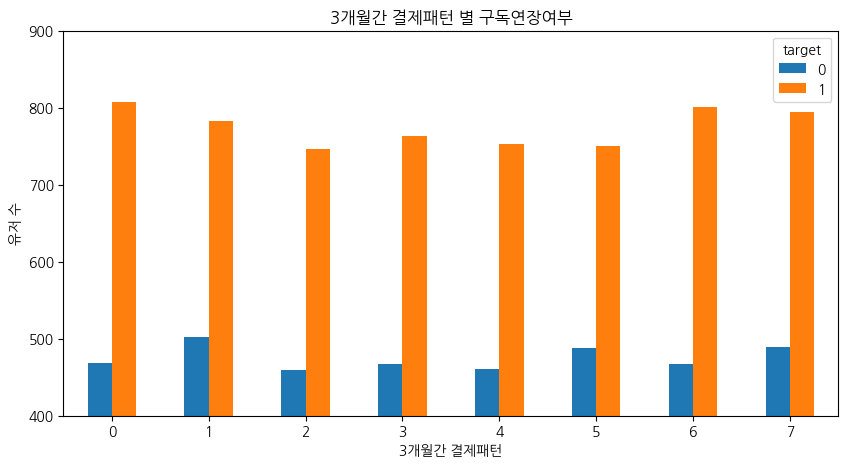

In [206]:
target_pivot_table.plot.bar(rot=0, figsize=(10,5))
plt.title("3개월간 결제패턴 별 구독연장여부")
plt.xlabel("3개월간 결제패턴")
plt.ylabel("유저 수")
plt.ylim(400, 900)

